# Exploratory Data Analysis
matplotlib  
seaborn

## Sanity checks
### Data Description (Melbourne_Housing.csv) :

The detailed data dictionary is given below:

* Suburb - Suburb in which the property is located
* Rooms - Number of rooms in the property
* Type - Type of the property like 
    * h - house,cottage,villa, semi,terrace, 
    * t - townhouse,
    * u - unit, duplex
* SellerG - Name of the real estate agent who sold the property
* Date - Date on which the property was sold
* Distance - Distance of the property from CBD in kilometres. CBD is the central business district of the city.
* Postcode - Postcode of the area
* Bedroom - Number of bedrooms in the property
* Bathroom - Number of bathrooms in the property
* Car - Number of car parking spaces in the property
* Landsize - Size of the land in square metres
* BuildingArea - Size of the building in square metres (Generally, building size is smaller than land size since someone can have personal gardens and other things in the property.) 
* YearBuilt - Year in which the building was built
* Regionname - Name of the region in which the property is located like Eastern Metropolitan, Western Metropolitan, Northern Victoria etc.
* Propertycount - Number of properties that are present in the suburb
* Price - price (in AUD) at which the property was sold

In [63]:
# to help with reading and manipulating data
import numpy as np
import pandas as pd

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# to restrict the float value to 3 decimal places
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# display cell output
pd.set_option('display.width', 300)

data = pd.read_csv('data/Melbourne_Housing.csv')
print(data.info())
print('*****' * 30)
print(data.describe())
print('*****' * 30)
print(data.head(4))
print('*****' * 30)
print(data.tail(4))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10543 non-null  object 
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(7), int64(3), object(6)
memory usage: 3.3+ MB
None
********************************

In [24]:
# Unique sellers
print(len(data['SellerG'].unique()))
print('*****' * 30)
print(data['SellerG'].value_counts())
print('*****' * 30)
data['Date'] = pd.to_datetime(data['Date'], dayfirst=True)
print(data.sample(5))
print('*****' * 30)
print(data.groupby(['SellerG'])['Price'].sum())
print('*****' * 30)
print(data[data['SellerG'] == 'ASL']['Price'].sum())


347
******************************************************************************************************************************************************
SellerG
Nelson           2733
Jellis           2517
Barry            2386
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: count, Length: 347, dtype: int64
******************************************************************************************************************************************************
               Suburb  Rooms Type     SellerG       Date  Distance  Postcode  Bedroom  Bathroom   Car  Landsize BuildingArea  YearBuilt             Regionname  Propertycount    Price
316    Bentleigh East      4    t      Buxton 2016-12-03    13.900  3165.000      NaN       NaN   NaN       NaN          NaN        NaN  Southern Metropolitan          10969  1200000
2259         Watsonia      3    h  Buck

In [31]:
print(data['BuildingArea'].unique())
print('*****' * 30)
# checking the count of different data types in buildingArea column
print(data['BuildingArea'].apply(type).value_counts())
print('*****' * 30)
# replacing values with nan
data['BuildingArea'] = data['BuildingArea'].replace(['missing','inf'], np.nan)
# changing the data type to float
data['BuildingArea'] = data['BuildingArea'].astype(float)
print(data['BuildingArea'].info())
print('*****' * 30)
print(data['BuildingArea'].apply(type).value_counts())

['225' '82' 'inf' '263' '242' '251' '117' 'missing' '76' '399' '118' '103'
 '180' '123' '218' '129' '167' '154' '275' '121' nan '125' '255' '75'
 '156' '240' '268' '108' '69' '140' '214' '253' '189' '215' '96' '104'
 '100' '313' '144' '93' '110' '70' '122' '51' '147' '113' '83' '56' '137'
 '85' '64' '175' '3558' '170' '265' '353' '138' '19' '116' '87' '74' '320'
 '300' '210' '120' '86' '97' '200' '106' '14' '161' '128' '185' '146'
 '133' '115' '143' '150' '195' '236' '276' '188' '179' '249' '141' '34'
 '73' '107' '84' '81' '207' '50' '264' '312' '235' '221' '183' '132' '160'
 '186' '78' '105' '145' '62' '220' '315' '181' '61' '112' '420' '226'
 '266' '410' '449' '356' '477' '250' '95' '190' '284' '247' '213' '209'
 '119' '111' '130' '348' '166' '44' '176' '98' '159' '79' '71' '60' '33'
 '89' '217' '127' '187' '109' '53' '201' '12' '63' '223' '102' '254' '327'
 '16' '165' '65' '139' '134' '280' '67' '272' '38' '153' '66' '152' '135'
 '374' '163' '124' '233' '39' '151' '279' '136' '405' 

In [32]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Suburb         27114 non-null  object        
 1   Rooms          27114 non-null  int64         
 2   Type           27114 non-null  object        
 3   SellerG        27114 non-null  object        
 4   Date           27114 non-null  datetime64[ns]
 5   Distance       27113 non-null  float64       
 6   Postcode       27113 non-null  float64       
 7   Bedroom        20678 non-null  float64       
 8   Bathroom       20672 non-null  float64       
 9   Car            20297 non-null  float64       
 10  Landsize       17873 non-null  float64       
 11  BuildingArea   10529 non-null  float64       
 12  YearBuilt      11985 non-null  float64       
 13  Regionname     27114 non-null  object        
 14  Propertycount  27114 non-null  int64         
 15  Price          2711

In [35]:
# We could have also done replacement of 'missing' and 'inf' to NaN while loading data by using na_values parameter of read_csv function.
# eg use
data_new = pd.read_csv('data/Melbourne_Housing.csv', na_values=['missing','inf'])
print(data_new.info())
print(data_new['BuildingArea'].unique())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27114 entries, 0 to 27113
Data columns (total 16 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         27114 non-null  object 
 1   Rooms          27114 non-null  int64  
 2   Type           27114 non-null  object 
 3   SellerG        27114 non-null  object 
 4   Date           27114 non-null  object 
 5   Distance       27113 non-null  float64
 6   Postcode       27113 non-null  float64
 7   Bedroom        20678 non-null  float64
 8   Bathroom       20672 non-null  float64
 9   Car            20297 non-null  float64
 10  Landsize       17873 non-null  float64
 11  BuildingArea   10529 non-null  float64
 12  YearBuilt      11985 non-null  float64
 13  Regionname     27114 non-null  object 
 14  Propertycount  27114 non-null  int64  
 15  Price          27114 non-null  int64  
dtypes: float64(8), int64(3), object(5)
memory usage: 3.3+ MB
None
[ 225.       82.           nan  

## Sanity checks - Part2
Missing value treatment  
Remove duplicate entries in data  
Check the count and Percentage of categorical levels in each column  

In [64]:
# Check for missing values in the data
data.isnull().sum()

Suburb               0
Rooms                0
Type                 0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom           6436
Bathroom          6442
Car               6817
Landsize          9241
BuildingArea     16571
YearBuilt        15129
Regionname           0
Propertycount        0
Price                0
dtype: int64

In [65]:
# Check for duplicate entries in the data
data.duplicated().sum()

np.int64(11)

In [66]:
# dropping duplicates entries from the data
data.drop_duplicates(inplace=True)
print(data.duplicated().sum())
print('*****' * 30)
print(data.head(5))

0
******************************************************************************************************************************************************
         Suburb  Rooms Type        SellerG        Date  Distance  Postcode  Bedroom  Bathroom   Car  Landsize BuildingArea  YearBuilt             Regionname  Propertycount    Price
0  Airport West      3    t         Nelson  03-09-2016    13.500  3042.000    3.000     2.000 1.000   303.000          225   2016.000   Western Metropolitan           3464   840000
1   Albert Park      2    h  hockingstuart  03-09-2016     3.300  3206.000    2.000     1.000 0.000   120.000           82   1900.000  Southern Metropolitan           3280  1275000
2   Albert Park      2    h        Thomson  03-09-2016     3.300  3206.000    2.000     1.000 0.000   159.000          inf        NaN  Southern Metropolitan           3280  1455000
3    Alphington      4    h          Brace  03-09-2016     6.400  3078.000    3.000     2.000 4.000   853.000          263 

In [67]:
# resetting the index of data frame since some rows will be removed
data.reset_index(drop=True, inplace=True)
print('*****' * 30)
print(data.head(5))

******************************************************************************************************************************************************
         Suburb  Rooms Type        SellerG        Date  Distance  Postcode  Bedroom  Bathroom   Car  Landsize BuildingArea  YearBuilt             Regionname  Propertycount    Price
0  Airport West      3    t         Nelson  03-09-2016    13.500  3042.000    3.000     2.000 1.000   303.000          225   2016.000   Western Metropolitan           3464   840000
1   Albert Park      2    h  hockingstuart  03-09-2016     3.300  3206.000    2.000     1.000 0.000   120.000           82   1900.000  Southern Metropolitan           3280  1275000
2   Albert Park      2    h        Thomson  03-09-2016     3.300  3206.000    2.000     1.000 0.000   159.000          inf        NaN  Southern Metropolitan           3280  1455000
3    Alphington      4    h          Brace  03-09-2016     6.400  3078.000    3.000     2.000 4.000   853.000          263   

In [69]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rooms,27103.000,2.992,0.955,1.000,2.000,3.000,4.000,16.000
Distance,27102.000,11.280,6.784,0.000,6.400,10.500,14.000,48.100
Postcode,27102.000,3113.787,111.129,3000.000,3046.000,3088.000,3153.000,3978.000
Bedroom,20678.000,3.046,0.955,0.000,2.000,3.000,4.000,20.000
Bathroom,20672.000,1.592,0.701,0.000,1.000,1.000,2.000,9.000
Car,20297.000,1.716,0.994,0.000,1.000,2.000,2.000,18.000
Landsize,17873.000,560.537,1411.309,50.000,220.000,513.000,664.000,76000.000
YearBuilt,11985.000,1966.618,36.042,1850.000,1950.000,1970.000,2000.000,2019.000
Propertycount,27103.000,7564.741,4494.028,83.000,4294.000,6567.000,10412.000,21650.000
Price,27103.000,1050664.131,641660.161,85000.000,635000.000,871000.000,1300000.000,11200000.000


In [71]:
# find the entries with Rooms =16
print(data[data['Rooms'] == 16])

        Suburb  Rooms Type SellerG        Date  Distance  Postcode  Bedroom  Bathroom   Car  Landsize BuildingArea  YearBuilt            Regionname  Propertycount    Price
25916  Mitcham     16    h  Buxton  28-10-2017    17.200  3132.000   16.000     8.000 8.000       NaN          NaN        NaN  Eastern Metropolitan           6871  5000000


In [72]:
# Check the total number of unique values in the Postcode column
data['Postcode'].nunique()

209

In [ ]:
# Making a list of all categorical variables
cat_col = ['Suburb', 'Type', 'SellerG', 'Regionname']

# Printing the count of unique categorical levels in each column and its percentage
for column in cat_col:
    print(data[column].value_counts())
    print("-" * 50)

print('*****' * 30)

# Print its percentage
for column in cat_col:
    print(data[column].value_counts(normalize=True))
    print("-" * 50)


Suburb
Reservoir         724
Bentleigh East    493
Richmond          437
Preston           410
Brunswick         383
                 ... 
Wandin North        1
Ferny Creek         1
Tecoma              1
Montrose            1
viewbank            1
Name: count, Length: 345, dtype: int64
--------------------------------------------------
Type
h    18394
u     5882
t     2827
Name: count, dtype: int64
--------------------------------------------------
SellerG
Nelson           2733
Jellis           2516
Barry            2385
hockingstuart    2096
Ray              1574
                 ... 
Allan               1
Jim                 1
iProperty           1
Batty               1
Icon                1
Name: count, Length: 347, dtype: int64
--------------------------------------------------
Regionname
Southern Metropolitan         8480
Northern Metropolitan         7809
Western Metropolitan          5792
Eastern Metropolitan          3264
South-Eastern Metropolitan    1336
Northern Victoria   

## Visualization techniques => Univariate Analysis => **Histogram**
1. **Histogram**
2. **Boxplot**
3. **Bar Graph**
4. **Line Plot**

### Histogram 
**It's a univariate plot which helps us understand the distribution of a continuous numerical variable.**  
**It breaks the range of the continuous variables into intervals of equal length and then counts the number of observations in each interval.**  
**We will use the histplot() function of seaborn to create histograms.**  

hue parameter  
FacetGrid

In [104]:
import pandas as pd

df = pd.read_csv('data/Automobile.csv')
print(df.columns)
print("*******" * 30)
print(df.shape)
print("*******" * 30)
print(df.info())
print("*******" * 30)
print(df.head(5))
print("*******" * 30)
print(df['price'].min(), df['price'].max())
print("*******" * 30)
print(df['price'].value_counts())
print("*******" * 30)
print(df.groupby(['price'])['price'].value_counts().sort_values(ascending=True))

Index(['symboling', 'normalized_losses', 'make', 'fuel_type', 'aspiration', 'number_of_doors', 'body_style', 'drive_wheels', 'engine_location', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_type', 'number_of_cylinders', 'engine_size', 'fuel_system', 'bore', 'stroke',
       'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price'],
      dtype='object')
******************************************************************************************************************************************************************************************************************
(201, 26)
******************************************************************************************************************************************************************************************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column               Non-Null Count  Dtype  
---  ------ 

<Axes: title={'center': 'Histogram: price'}, xlabel='Price of cars', ylabel='Frequency'>

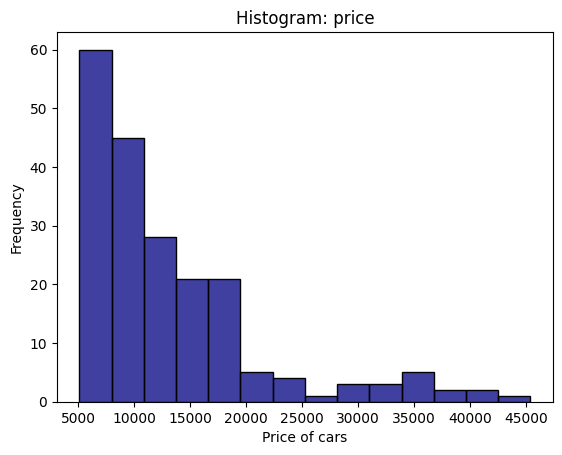

In [97]:
plt.title('Histogram: price')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Price of cars')
plt.ylabel('Frequency')
sns.histplot(data=df, x='price', color='navy')

<Axes: title={'center': 'Histogram: price'}, xlabel='Price of cars', ylabel='Frequency'>

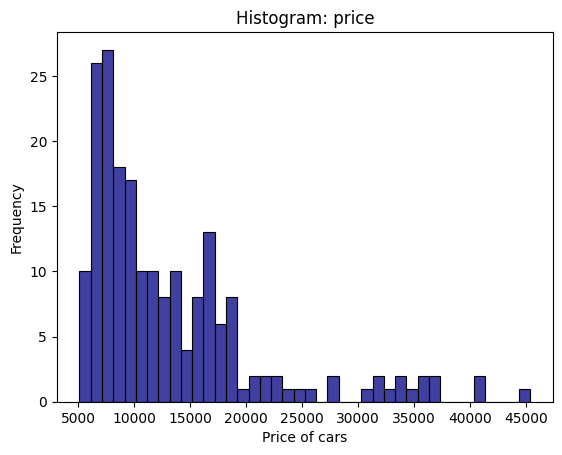

In [107]:
# specify the number of intervals (or groups or bins) to create by setting the bins parameter
plt.title('Histogram: price')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Price of cars')
plt.ylabel('Frequency')
sns.histplot(data=df, x='price', bins=40, color='navy')

<Axes: title={'center': 'Histogram: price'}, xlabel='Price of cars', ylabel='Frequency'>

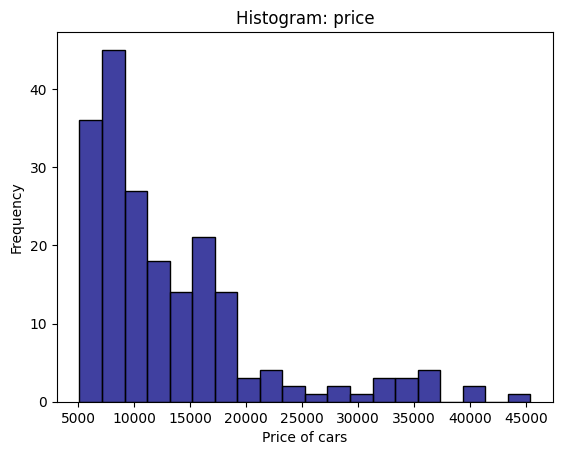

In [110]:
# binwidth
plt.title('Histogram: price')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Price of cars')
plt.ylabel('Frequency')
sns.histplot(data=df, x='price', binwidth = 2000, color='navy')

### How to find the optimal number of bins: Rule of thumb
* calculate the bin-width first, using the formula
$$ binwidth =\frac{(2 * IQR)}{\sqrt[3]{n}} $$
where n = number of rows in the datase
IQR = Inter quartile range. Difference between 75 and 25 percentile

* then, we obtain bins using the calculated bin-width. $$ bins =\frac{Range}{binwidth} $$

* **In addition to the bars, we can also add a density estimate by setting the *kde* parameter to *True*.**

- **Kernel Density Estimation**, or **KDE**, visualizes the distribution of data over a continuous interval.
- The conventional scale for KDE is: **Total frequency of each bin × Probability**

<Axes: title={'center': 'Histogram: price'}, xlabel='Price of cars', ylabel='Frequency'>

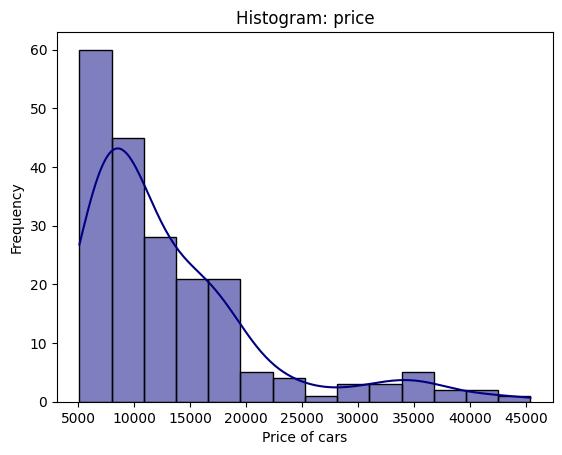

In [111]:
plt.title('Histogram: price')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Price of cars')
plt.ylabel('Frequency')
sns.histplot(data=df, x='price',kde = True, color='navy')

<Axes: title={'center': 'Histogram: curb_weight'}, xlabel='curb_weight', ylabel='Frequency'>

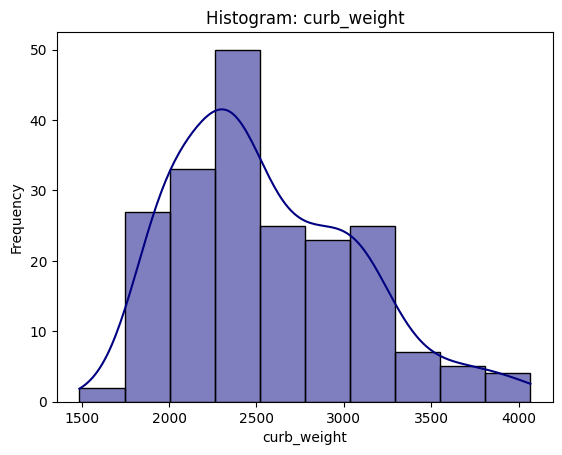

In [112]:
plt.title('Histogram: curb_weight')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('curb_weight')
plt.ylabel('Frequency')
sns.histplot(data=df, x = 'curb_weight', kde = True, color = 'navy')

<Axes: title={'center': 'Histogram: horsepower'}, xlabel='Horsepower', ylabel='Frequency'>

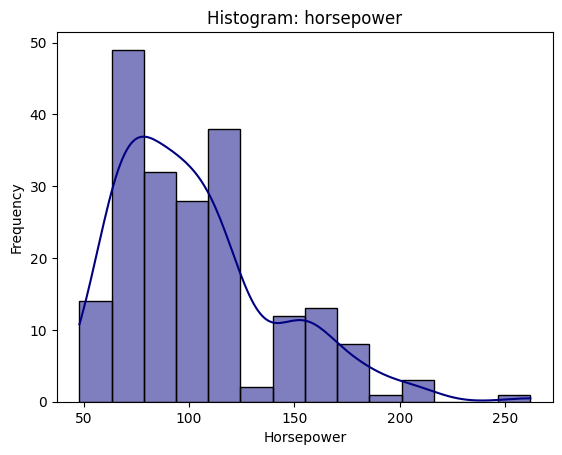

In [113]:
plt.title('Histogram: horsepower')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('Horsepower')
plt.ylabel('Frequency')
sns.histplot(data=df, x = 'horsepower', kde = True, color = 'navy')

### While histograms are traditionally associated with numerical data, adapting them to categorical variables offers a visual means of understanding the frequency of different categories within your dataset.
Subplots provide a unified figure layout, ensuring consistent axes scaling and alignment across multiple plots.

<Axes: title={'center': 'Histogram: Price by body_style'}, xlabel='price', ylabel='Frequency'>

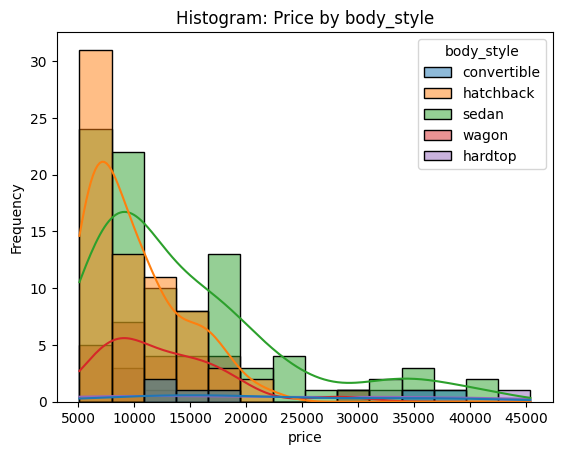

In [114]:
# Compare the distribution of several groups
plt.title('Histogram: Price by body_style')
#plt.xlim(4500, 46000)
#plt.ylim(0, 70)
plt.xlabel('price')
plt.ylabel('Frequency')
sns.histplot(data=df, x = 'price', hue = 'body_style' ,kde = True, color = 'navy')

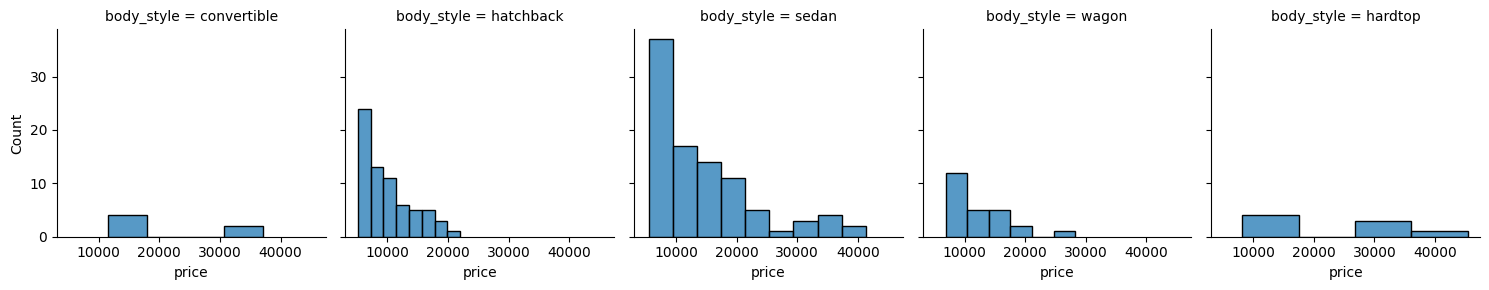

In [117]:
g = sns.FacetGrid(df, col='body_style')
g.map(sns.histplot, 'price')

## Visualization techniques => Univariate Analysis => **Boxplot**
1. **Histogram**
2. **Boxplot**
3. **Bar Graph**
4. **Line Plot**

### Box plot
